In [7]:
!pip install seaborn

     -------------------------------------- 285.1/285.1 kB 2.5 MB/s eta 0:00:00


In [3]:
!pip3 install -U scikit-learn

     ---------------------------------------- 7.1/7.1 MB 4.6 MB/s eta 0:00:00
     -------------------------------------- 307.0/307.0 kB 2.7 MB/s eta 0:00:00


# Accuracy(정확도)
- 불귱형한 레이블 값 분포에서 ML 모델의 성능을 판단할 경우 적합한 방법이 아니다.

In [8]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

tdf = pd.read_csv('../m6_머신런닝 알고리즘 이해 및 활용/titanic_train.csv')
tdf.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [9]:
from sklearn.preprocessing import LabelEncoder

# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 피처 제거
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

# 레이블 인코딩 수행.
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 데이터 전처리 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df


In [21]:
from sklearn.metrics import accuracy_score, precision_score , recall_score , f1_score, confusion_matrix

def get_clf_eval(y_test , pred):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, f1: {3:.4f}'.format(accuracy , precision ,recall, f1))


In [22]:
y_tdf = tdf['Survived']
x_tdf = tdf.drop('Survived',axis=1)
x_tdf = transform_features(x_tdf)

x_train, x_test, y_train, y_test = train_test_split(x_tdf, y_tdf, test_size=0.2, random_state=11)
lr_clf = LogisticRegression(solver='liblinear')

lr_clf.fit(x_train, y_train)
pred = lr_clf.predict(x_test)
get_clf_eval(y_test,pred)

오차 행렬
[[108  10]
 [ 14  47]]
정확도: 0.8659, 정밀도: 0.8246, 재현율: 0.7705, f1: 0.7966


#### 과제_0914_1. 상기 오차 행렬로 수작업으로 정확도, 정밀도, 재현율, F1 score를 구하세요.

In [28]:
# 정밀도 = TP/(FP+TP)
# 재현율 = TP/(FN+TP)
# 정확도 = (TN+TP)/(TN+TP+FN+FP) (예측 결과와 실제 값이 동일한 건수/전체 데이터 수)
# f1_score = 2*pre*re/(pre+re)
precision1 = 47/(10+47)
recall1 = 47/(14+47)
acc = (108+47)/(108+47+14+10)
f1_s = 2*precision1*recall1/(precision1+recall1)
print('정밀도 : {0:.4f}, 재현율: {1:.4f}, 정확도: {2:.4f} f1:{3:.4f}'.format(precision1, recall1, acc, f1_s))

정밀도 : 0.8246, 재현율: 0.7705, 정확도: 0.8659 f1:0.7966


#### 0914_2. Precision과 Recall간의 Trade-off 관계를 시각화로 설명하세요. 164p(155-166)

#### 0914_3. ROC Curve와 AUC를 시각화하여 의미를 설명하고 ROC AUC 값을 구하세요.

#### 피마 인디언 당뇨병 예측
* 데이터 세트는 북아메리카 피마 지역 원주민의 Type-2 당뇨병 결과 데이터임.
* 고립된 지역에서 인디언 고유의 혈통이 지속돼 왔지만 20세기 후반에 들어서면서 서구화된 식습관으로 많은 당뇨 환자 발생

#### [과제] diabetes.csv 데이터세트를 이용해 다음사항을 수행하여 당뇨병 여부를 판단하는 머신러닝 예측 모델을 작성하고 평가하세요.
- SkinThickness 와 Insulin의 0 값은 상당히 많기 때문에 일괄 삭제가 어려우며 평균값으로 대체
- 정확도, 정밀도, 재현율, F1 Score, ROC_AUC Score를 포함하는 평가지표 사용자 함수 작성
- 정밀도와 재현율의 임곗값에 따른 값 변화를 곡선 형태로 시각화
- 전체적인 성능 평가 지표를 유지하면서 재현율을 약간 향상시키는 임계값 산출
- 산출된 임계값을 적용한 평가
- 0 Negative, 1 Positive

※ 피처 정보  
'Pregnancies'(임신 횟수), 'Glucose'(포도당 부하 검사 수치), 'BloodPressure'(혈압), 
'SkinThickness'(팔 삼두근 뒤쪽의 피하지방 측정값, 'Insulin'(혈청 인슈린),
'BMI'(체질량 지수), 'DiabetesPedigreeFunction'(당뇨 내력 가중치 값), 'Age', 'Outcome'(클래스 결정 값 0또는 1)


In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

diabetes_data = pd.read_csv('diabetes.csv')
# 당뇨환자 수 
print(diabetes_data['Outcome'].value_counts())
diabetes_data.head()

0    500
1    268
Name: Outcome, dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [29]:
# 0 갯수 파악
display(len(diabetes_data.loc[diabetes_data['Insulin']== 0]))
len(diabetes_data.loc[diabetes_data['SkinThickness']== 0])

374

227

In [33]:
# 0값 평균값으로 변경
diabetes_data.replace({'SkinThickness':{0:diabetes_data.SkinThickness.mean()}, 'Insulin':{0:diabetes_data.Insulin.mean()}},inplace=True)

In [37]:
# 0값 변경 확인
display(len(diabetes_data.loc[diabetes_data['Insulin']== 0]))
len(diabetes_data.loc[diabetes_data['SkinThickness']== 0])

0

0

In [38]:
# 사용자 함수 생성
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [49]:
# 시각화 그래프 함수 생성
def precision_recall_curve_plot(y_test=None, pred_proba_c1=None):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    # x축을 threshold값으로, y축은 정밀도, 재현율 값으로  plot 수행. 정밀도는 점선으로 
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    # threshold 값 x축의 scale을 0.1 단위로 
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()

In [43]:
# 피처 데이터 세트 X, 레이블 데이터 세트 y를 추출. 
# 맨 끝이 Outcome(양성판단,종속변수) 컬럼으로 레이블 값임. 컬럼 위치 -1을 이용해 추출 
x = diabetes_data.iloc[:, :-1]
y = diabetes_data.iloc[:, -1]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 156, stratify=y)

# 로지스틱 회귀로 학습,예측 및 평가 수행. 
lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(x_train , y_train)
pred = lr_clf.predict(x_test)
pred_proba = lr_clf.predict_proba(x_test)[:, 1]

get_clf_eval(y_test , pred, pred_proba)

오차 행렬
[[88 12]
 [23 31]]
정확도: 0.7727, 정밀도: 0.7209, 재현율: 0.5741,    F1: 0.6392, AUC:0.8081


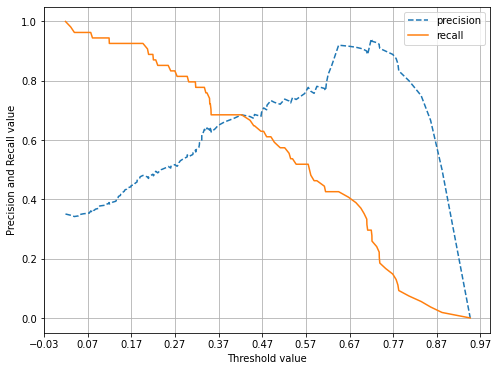

In [41]:
pred_proba_c1 = lr_clf.predict_proba(X_test)[:, 1]
precision_recall_curve_plot(y_test, pred_proba_c1)

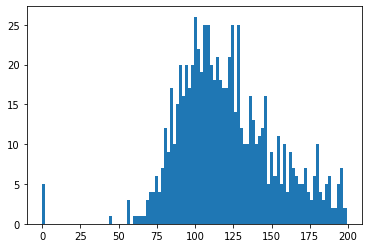

In [48]:
plt.hist(diabetes_data['Glucose'], bins=100)
plt.show()

In [52]:
from sklearn.preprocessing import Binarizer

def get_eval_by_threshold(y_test , pred_proba_c1, thresholds):
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1) 
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임곗값:',custom_threshold)
        get_clf_eval(y_test , custom_predict, pred_proba_c1)

In [54]:
# 임계값 0.3에서 0.5까지 0.03씩 변화시키면서 
thresholds = [0.3 , 0.33 ,0.36,0.39, 0.42 , 0.45 ,0.48, 0.50]
pred_proba = lr_clf.predict_proba(x_test)
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds )

임곗값: 0.3
오차 행렬
[[70 30]
 [13 41]]
정확도: 0.7208, 정밀도: 0.5775, 재현율: 0.7593,    F1: 0.6560, AUC:0.8083
임곗값: 0.33
오차 행렬
[[74 26]
 [15 39]]
정확도: 0.7338, 정밀도: 0.6000, 재현율: 0.7222,    F1: 0.6555, AUC:0.8083
임곗값: 0.36
오차 행렬
[[78 22]
 [18 36]]
정확도: 0.7403, 정밀도: 0.6207, 재현율: 0.6667,    F1: 0.6429, AUC:0.8083
임곗값: 0.39
오차 행렬
[[82 18]
 [20 34]]
정확도: 0.7532, 정밀도: 0.6538, 재현율: 0.6296,    F1: 0.6415, AUC:0.8083
임곗값: 0.42
오차 행렬
[[83 17]
 [20 34]]
정확도: 0.7597, 정밀도: 0.6667, 재현율: 0.6296,    F1: 0.6476, AUC:0.8083
임곗값: 0.45
오차 행렬
[[84 16]
 [20 34]]
정확도: 0.7662, 정밀도: 0.6800, 재현율: 0.6296,    F1: 0.6538, AUC:0.8083
임곗값: 0.48
오차 행렬
[[89 11]
 [20 34]]
정확도: 0.7987, 정밀도: 0.7556, 재현율: 0.6296,    F1: 0.6869, AUC:0.8083
임곗값: 0.5
오차 행렬
[[89 11]
 [21 33]]
정확도: 0.7922, 정밀도: 0.7500, 재현율: 0.6111,    F1: 0.6735, AUC:0.8083


In [55]:
# f1 score 0.6869로 임계값 0.48가 수치가좋아보임 (재현율과 정밀도만 보고선 평균적 판단이 개인적으로는 어려워 f1보고 판단이 쉬웠음)

In [57]:
# 임곗값를 0.48로 설정한 Binarizer 생성
binarizer = Binarizer(threshold=0.48)
pred_th_048 = binarizer.fit_transform(pred_proba[:, 1].reshape(-1,1)) 
get_clf_eval(y_test , pred_th_048, pred_proba[:, 1])

오차 행렬
[[89 11]
 [20 34]]
정확도: 0.7987, 정밀도: 0.7556, 재현율: 0.6296,    F1: 0.6869, AUC:0.8083


In [1]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

#### 과제_0915_2.
아래 boston 데이터 셋으로 보스턴 주택 가격 예측 모델을 만들고 평가하세요

In [2]:
from scipy import stats
from sklearn.datasets import load_boston

boston = load_boston()
print(boston.keys())
bdf = pd.DataFrame(boston.data, columns = boston.feature_names)
bdf['PRICE']= boston.target
bdf.head()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])


C:\Users\ejrgu\anaconda3\envs\bigdata3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California hou

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


- CRIM : 지역별 범죄 발생률
- ZN : 25,000 평방비트를 초과하는 거주 지역의 비율
- INDUS : 비상업 지역 넓이 비율
- CHAS :  찰스강에 대한 더미 변수 (강의 경계에 위치한 겨우는1, 아님 0)
- CRIM: 지역별 범죄 발생률  
- CHAS: 찰스강에 대한 더미 변수(강의 경계에 위치한 경우는 1, 아니면 0)
- NOX: 일산화질소 농도
- RM: 거주할 수 있는 방 개수
* AGE: 1940년 이전에 건축된 소유 주택의 비율
- DIS: 5개 주요 고용센터까지의 가중 거리
* RAD: 고속도로 접근 용이도
* TAX: 10,000달러당 재산세율
* PTRATIO: 지역의 교사와 학생 수 비율
* B: 지역의 흑인 거주 비율
* LSTAT: 하위 계층의 비율
* MEDV: 본인 소유의 주택 가격(중앙값)

In [3]:
bdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB
